# Survival Analysis

In [1]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
from sklearn.model_selection import train_test_split

#### Kaplan-Meier

In [2]:
df = pd.read_csv('../data/support2.csv')

### Experiment with [Support2](https://archive.ics.uci.edu/dataset/880/support2)

In [3]:
df.head(10)

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0000
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0000
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0000
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0000
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0000
6,93.01599,1,male,1,4,4,Coma,Coma,1,14.0,...,0.699951,140.0,7.659180,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0000
7,62.37097,1,male,0,9,659,CHF,COPD/CHF/Cirrhosis,1,14.0,...,1.599854,132.0,7.479492,NaN,NaN,NaN,0.0,1.0,no(M2 and SIP pres),1.0000
8,86.83899,1,male,0,7,142,CHF,COPD/CHF/Cirrhosis,3,NaN,...,2.000000,139.0,7.509766,NaN,NaN,NaN,NaN,0.0,NaN,0.0000
9,85.65594,1,male,0,12,63,Lung Cancer,Cancer,2,12.0,...,1.000000,143.0,7.449219,NaN,NaN,NaN,NaN,7.0,NaN,7.0000
10,42.25897,1,female,0,8,370,Colon Cancer,Cancer,0,11.0,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.4948


In [4]:
df.dtypes

age         float64
death         int64
sex          object
hospdead      int64
slos          int64
d.time        int64
dzgroup      object
dzclass      object
num.co        int64
edu         float64
income       object
scoma       float64
charges     float64
totcst      float64
totmcst     float64
avtisst     float64
race         object
sps         float64
aps         float64
surv2m      float64
surv6m      float64
hday          int64
diabetes      int64
dementia      int64
ca           object
prg2m       float64
prg6m       float64
dnr          object
dnrday      float64
meanbp      float64
wblc        float64
hrt         float64
resp        float64
temp        float64
pafi        float64
alb         float64
bili        float64
crea        float64
sod         float64
ph          float64
glucose     float64
bun         float64
urine       float64
adlp        float64
adls        float64
sfdm2        object
adlsc       float64
dtype: object

In [5]:
df.describe()

,age,death,hospdead,slos,d.time,num.co,edu,scoma,charges,totcst,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
count,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,8217.000000,...,6504.000000,9038.000000,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,9105.000000
mean,62.650823,0.681054,0.259198,17.863042,478.449863,1.868644,11.747691,12.058546,5.999579e+04,30825.867768,...,2.554463,1.770961,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,1.888272
std,15.593710,0.466094,0.438219,22.006440,560.383272,1.344409,3.447743,24.636694,1.026488e+05,45780.820986,...,5.318448,1.686041,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,2.003763
min,18.041990,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.169000e+03,0.000000,...,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,52.797000,0.000000,0.000000,6.000000,26.000000,1.000000,10.000000,0.000000,9.740000e+03,5929.566400,...,0.500000,0.899902,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000
50%,64.856990,1.000000,0.000000,11.000000,233.000000,2.000000,12.000000,0.000000,2.502400e+04,14452.734400,...,0.899902,1.199951,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000
75%,73.998960,1.000000,1.000000,20.000000,761.000000,3.000000,14.000000,9.000000,6.459800e+04,36087.937500,...,1.899902,1.899902,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000
max,101.847960,1.000000,1.000000,343.000000,2029.000000,9.000000,31.000000,100.000000,1.435423e+06,633212.000000,...,63.000000,21.500000,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242


In [6]:
kmf = KaplanMeierFitter()

In [7]:
duration = df["d.time"]
observed = df["death"]

kmf.fit(duration, event_observed=observed)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 9105 total observations, 2904 right-censored observations>

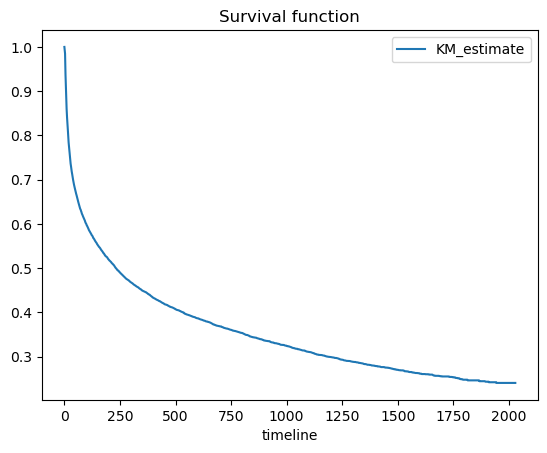

In [8]:
from matplotlib import pyplot as plt

kmf.survival_function_.plot()
plt.title('Survival function');

<Axes: xlabel='timeline'>

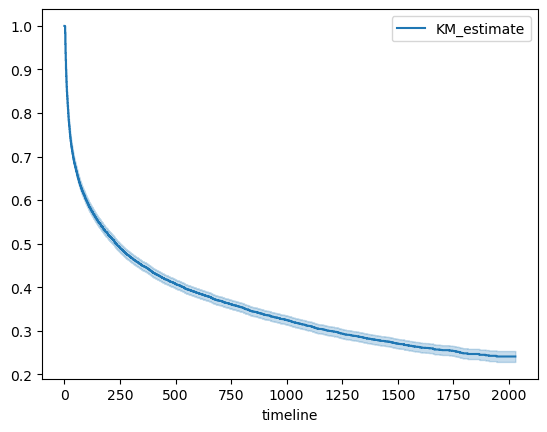

In [9]:
kmf.plot_survival_function()

In [10]:
kmf.median_survival_time_

np.float64(233.0)

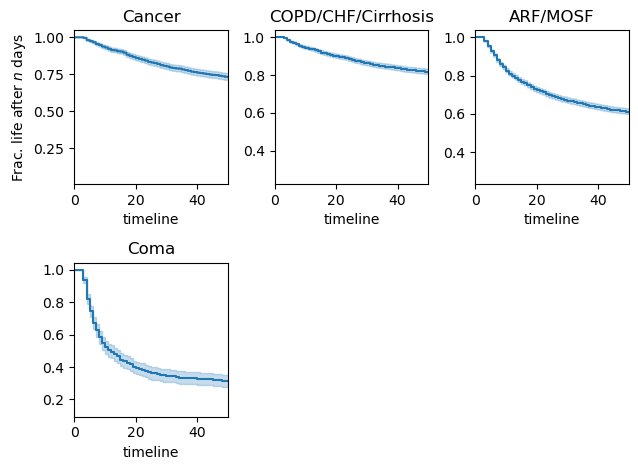

In [11]:
disease_types = df['dzclass'].unique()

for i, disease_type in enumerate(disease_types):
    ax = plt.subplot(2, 3, i + 1)

    ix = df['dzclass'] == disease_type
    kmf.fit(duration[ix], observed[ix], label=disease_type)
    kmf.plot_survival_function(ax=ax, legend=False)

    plt.title(disease_type)
    plt.xlim(0, 50)

    if i==0:
        plt.ylabel('Frac. life after $n$ days')

plt.tight_layout()

#### Nelson-Aalen 

In [12]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(duration,event_observed=observed)

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 9105 total observations, 2904 right-censored observations>

<Axes: xlabel='timeline'>

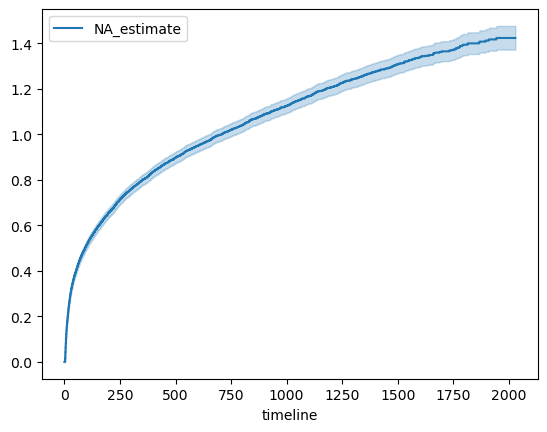

In [13]:
naf.plot_cumulative_hazard()

#### Survival Tree

To-do:

- Create a survival tree from scikit-survival
- Make a pipeline for data to fit into the tree
- Change the scikit-survival data to support time-to-event

##### Pipelining Data Support 2

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

class Dataset:
    def __init__(self, data, impute_rest=True):
        self.data = data
        self.preprocess(impute_rest)
        self.label = self.create_label()

    def create_label(self):
        self.data["death"] = self.data["death"].astype('bool')
        label = self.data[["death", "d.time"]]
        record = label.to_records(index=False)
        structured_arr = np.stack(record, axis=0)

        self.data.drop(["death", "d.time"], axis=1, inplace=True)

        return structured_arr

    def preprocess(self, impute_rest):
        self.impute_values(impute_rest)
        self.drop_values()
        self.data.dropna(axis=1, inplace=True)
        self.convert_to_one_hot()

        # self.data = self.data[self.data["death"] ==1]

    def impute_values(self, impute_rest):
        VALUE = {
            "alb": 3.5,
            "pafi": 333.3,
            "bili": 1.01,
            "crea": 1.01,
            "bun": 6.51,
            "wblc": 9.0,
            "urine": 2502.0,
        }

        self.data.fillna(value=VALUE, inplace=True)

    def drop_values(self):
        TO_DROP = [
            "aps",
            "sps",
            "surv2m",
            "surv6m",
            "prg2m",
            "prg6m",
            "dnr",
            "dnrday",
            "sfdm2",
            "hospdead",
            "slos",
            "charges",
            "totcst",
            "totmcst",
        ]

        self.data.drop(TO_DROP, axis=1, inplace=True)

    def convert_to_one_hot(self):
        TO_CONVERT = [
            "sex",
            "dzgroup",
            "dzclass",
            # "race",
            "ca",
            # "adlp",
            # "edu",
            # "income"
        ]
        self.data = pd.get_dummies(self.data, columns=TO_CONVERT)
    
    def get_label(self):
        return self.label

    def get_train_test(self, test_size=0.2):
        x_train, y_train, x_test, y_test = train_test_split(self.data, self.label, test_size=test_size, random_state=42)
        return x_train, y_train, x_test, y_test

    def get_data(self):
        return self.data

Impute NaN Values

In [15]:
data = Dataset(df)
trunc_data = data.get_data()
trunc_data.head()

,age,num.co,hday,diabetes,dementia,wblc,pafi,alb,bili,crea,...,dzgroup_Coma,dzgroup_Lung Cancer,dzgroup_MOSF w/Malig,dzclass_ARF/MOSF,dzclass_COPD/CHF/Cirrhosis,dzclass_Cancer,dzclass_Coma,ca_metastatic,ca_no,ca_yes
1,62.84998,0,1,0,0,6.000000,388.00000,1.799805,0.199982,1.199951,...,False,True,False,False,False,True,False,True,False,False
2,60.33899,2,3,0,0,17.097656,98.00000,3.500000,1.010000,5.500000,...,False,False,False,False,True,False,False,False,True,False
3,52.74698,2,4,0,0,8.500000,231.65625,3.500000,2.199707,2.000000,...,False,False,False,False,True,False,False,False,True,False
4,42.38498,2,1,0,0,9.099609,333.30000,3.500000,1.010000,0.799927,...,False,True,False,False,False,True,False,True,False,False
5,79.88495,1,3,0,0,13.500000,173.31250,3.500000,1.010000,0.799927,...,False,False,False,True,False,False,False,False,True,False


Convert label into Status and Survival Time

In [16]:
data_label = data.get_label()
data_label

array([(False, 2029), ( True,    4), ( True,   47), ..., (False,  346),
       ( True,    7), ( True,  198)],
      dtype=(numpy.record, [('death', '?'), ('d.time', '<i8')]))

Use Survival Tree

In [17]:
from sksurv.tree import SurvivalTree

In [18]:
X_train, X_test, y_train, y_test = data.get_train_test()
len(X_train), len(y_train), len(X_test), len(y_test)

(7284, 7284, 1821, 1821)

In [19]:
survtree = SurvivalTree(criterion="mixed", max_depth=5, random_state=42)

In [20]:
survtree.fit(X_train, y_train)

y: [[526.   1.]
 [ 12.   1.]
 [386.   1.]
 ...
 [ 25.   1.]
 [385.   1.]
 [ 18.   1.]]
y: [[526.   1.]
 [ 12.   1.]
 [386.   1.]
 ...
 [ 25.   1.]
 [385.   1.]
 [ 18.   1.]]
y: [[526.   1.]
 [ 12.   1.]
 [386.   1.]
 ...
 [ 25.   1.]
 [385.   1.]
 [ 18.   1.]]
y: [[526.   1.]
 [ 12.   1.]
 [386.   1.]
 ...
 [ 25.   1.]
 [385.   1.]
 [ 18.   1.]]
y: [[526.   1.]
 [ 12.   1.]
 [386.   1.]
 ...
 [ 25.   1.]
 [385.   1.]
 [ 18.   1.]]
y: [[526.   1.]
 [ 12.   1.]
 [386.   1.]
 ...
 [ 25.   1.]
 [385.   1.]
 [ 18.   1.]]
y: [[526.   1.]
 [ 12.   1.]
 [386.   1.]
 ...
 [ 25.   1.]
 [385.   1.]
 [ 18.   1.]]
y: [[526.   1.]
 [ 12.   1.]
 [386.   1.]
 ...
 [ 25.   1.]
 [385.   1.]
 [ 18.   1.]]
y: [[526.   1.]
 [ 12.   1.]
 [386.   1.]
 ...
 [ 25.   1.]
 [385.   1.]
 [ 18.   1.]]
y: [[526.   1.]
 [ 12.   1.]
 [386.   1.]
 ...
 [ 25.   1.]
 [385.   1.]
 [ 18.   1.]]
y: [[526.   1.]
 [ 12.   1.]
 [386.   1.]
 ...
 [ 25.   1.]
 [385.   1.]
 [ 18.   1.]]
y: [[526.   1.]
 [ 12.   1.]
 [386.   1.]
 

SurvivalTree(criterion='mixed', max_depth=5, random_state=42)

In [21]:
survtree.score(X_test, y_test)

np.float64(0.4985984084702229)

In [22]:
X_test_sorted = X_test.sort_values(by=["age"])
X_test_sel = pd.concat((X_test_sorted.head(3), X_test_sorted.tail(3)))

X_test_sel

,age,num.co,hday,diabetes,dementia,wblc,pafi,alb,bili,crea,...,dzgroup_Coma,dzgroup_Lung Cancer,dzgroup_MOSF w/Malig,dzclass_ARF/MOSF,dzclass_COPD/CHF/Cirrhosis,dzclass_Cancer,dzclass_Coma,ca_metastatic,ca_no,ca_yes
9095,18.04199,0,4,0,0,11.599609,240.00000,3.500000,1.010000,0.899902,...,False,False,True,True,False,False,False,False,False,True
178,18.14600,2,1,0,0,2.000000,314.25000,1.899902,0.299988,10.699219,...,False,False,False,True,False,False,False,False,True,False
7539,18.77599,0,1,0,0,17.097656,46.66406,3.399902,1.099854,1.699951,...,False,False,False,True,False,False,False,False,True,False
5946,97.51099,2,1,0,0,11.398438,204.75000,4.000000,0.899902,1.099854,...,True,False,False,False,False,False,True,False,True,False
2390,100.13098,3,1,0,0,6.000000,333.30000,3.699707,1.010000,1.099854,...,False,False,False,False,True,False,False,False,False,True
7609,101.84796,4,1,0,0,8.000000,333.30000,3.699707,1.500000,1.699951,...,False,False,False,False,True,False,False,False,True,False


In [23]:
survtree.predict(X_test_sel)

array([2.14395469e+24, 5.71721252e+24, 5.71721252e+24, 8.16013602e+23,
       8.16013602e+23, 8.16013602e+23])

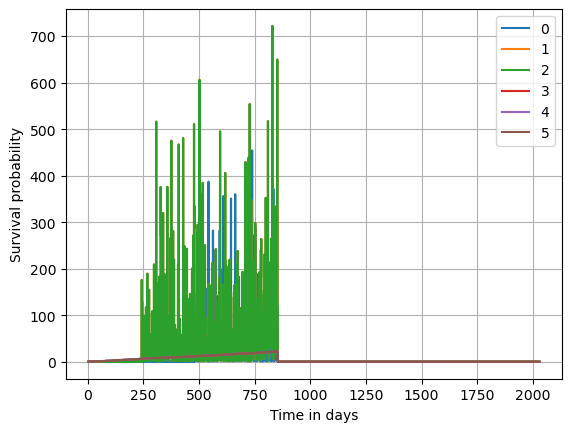

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

surv = survtree.predict_survival_function(X_test_sel, return_array=True)

for i, s in enumerate(surv):
    plt.step(survtree.unique_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

[Text(330.6666666666667, 323.4, 'hday <= 121.5\nlogrank = inf\nsamples = 7284\nvalue = np.bytes_()'),
 Text(248.0, 230.99999999999997, 'alb <= 5.649\nlogrank = inf\nsamples = 7281\nvalue = np.bytes_()'),
 Text(165.33333333333334, 138.6, 'age <= 18.917\nlogrank = inf\nsamples = 7277\nvalue = np.bytes_()'),
 Text(82.66666666666667, 46.19999999999999, '\n  (...)  \n'),
 Text(248.0, 46.19999999999999, '\n  (...)  \n'),
 Text(330.6666666666667, 138.6, 'logrank = inf\nsamples = 4\nvalue = np.bytes_()'),
 Text(413.33333333333337, 230.99999999999997, 'logrank = inf\nsamples = 3\nvalue = np.bytes_()')]

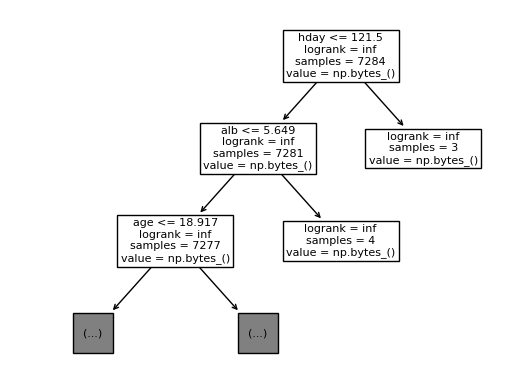

In [25]:
from visualize import plot_tree

plot_tree(survtree, max_depth=2, feature_names=X_train.columns, fontsize=8)

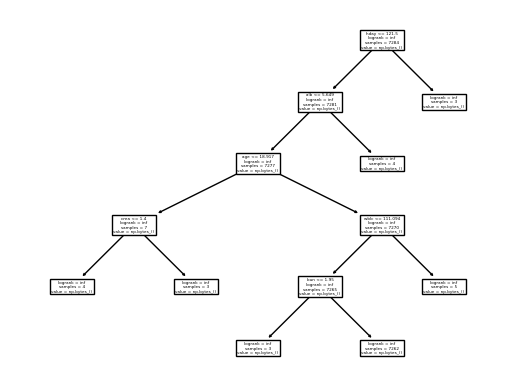

In [26]:
plot_tree(survtree, feature_names=X_train.columns, fontsize=3, class_names=["alive", "dead"])
plt.savefig("survival_tree.pdf")

Accelerated Failure Time Model

In [27]:
from sksurv.linear_model import IPCRidge

ipcr = IPCRidge(alpha=1.)
ipcr.fit(X_train, y_train)

IPCRidge()

In [28]:
ipcr.score(X_test, y_test)

np.float64(0.6333974634731445)

In [29]:
x_test_sel = X_test.sort_values(by=["age"]).tail(3)

ipcr.predict(x_test_sel)

array([ 11.74224114, 194.78441742, 144.64217079])

To Do:
- Explore Cython
- Explore Log Rank and MSE and how to merge it
- Explore AFT
- Output must be time to event